### 1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

Algo me diz que incidenceRate, ou seja, a taxa de incidência pode estar mais correlacionada, pois acredito que uma maior quantidade de incidencia leve a um consequente maior número de vítimas fatais da doença.

### EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_cancer = pd.read_csv('cancer_EUA.csv',  delimiter=';', decimal=',')
df_cancer.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0        890.770529             164.9          489.8    61898.0   
1        173.0        669.088363             161.3          411.6    48127.0   
2        102.0        744.083462             174.7          349.7    49348.0   
3        427.0        953.773339             194.8          430.4    44243.0   
4         57.0        646.194438             144.4          350.1    49955.0   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0    260131.0            11.2   499.748204   (61494.5, 125635]       39.3   
1     43269.0            18.6    23.111234  (48021.6, 51046.4]       33.0   
2     21026.0            14.6    47.560164  (48021.6, 51046.4]       45.0   
3     75882.0            17.1   342.637253    (42724.4, 45201]       42.8   
4     10321.0            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [3]:
df_cancer.tail()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
3042  1962.667684        762.753992             149.6     453.549422   
3043  1962.667684        838.694585             150.1     453.549422   
3044  1962.667684        829.638887             153.9     453.549422   
3045  1962.667684        943.206276             175.0     453.549422   
3046  1962.667684        808.811353             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap           binnedInc  \
3042    46961.0      6343.0            12.4     0.000000    (45201, 48021.6]   
3043    48609.0     37118.0            18.8   377.175494  (48021.6, 51046.4]   
3044    51144.0     34536.0            15.0  1968.959926  (51046.4, 54545.6]   
3045    50745.0     25609.0            13.3     0.000000  (48021.6, 51046.4]   
3046    41193.0     37030.0            13.9     0.000000  (40362.7, 42724.4]   

      MedianAge  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
3042       44.2  ...                     54.9                44.6   
3043       30.4  ...                     53.3                48.6   
3044       30.9  ...                     52.6                47.8   
3045       39.0  ...                     56.3                49.6   
3046       26.2  ...                     60.3                22.9   

     PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
3042              31.7                    13.2  90.280811   3.837754   
3043              28.8                    17.7  75.706245   2.326771   
3044              26.6                    16.8  87.961629   2.313188   
3045              29.5                    14.0  92.905681   1.176562   
3046              25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
3042  0.327613      1.700468             51.063830   7.773512  
3043  4.044920     14.130288             52.007937   8.186470  
3044  1.316472      5.680705             55.153949   7.809192  
3045  0.244632      2.131790             58.484232   7.582938  
3046  3.177753      1.356457             56.040242   8.981723  

[5 rows x 34 columns]

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
df_cancer.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [6]:
df_cancer.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [7]:
df_cancer.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [8]:
df_cancer[df_cancer['incidenceRate']>200]['Geography'].head(5)

0       Kitsap County, Washington
1     Kittitas County, Washington
2    Klickitat County, Washington
3        Lewis County, Washington
4      Lincoln County, Washington
Name: Geography, dtype: object

Text(0, 0.5, 'Percentual de pobreza (%)')

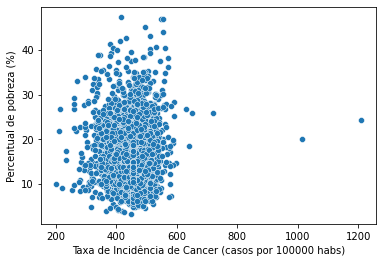

In [9]:
sns.scatterplot(data=df_cancer,y='povertyPercent',x='incidenceRate')
plt.xlabel('Taxa de Incidência de Cancer (casos por 100000 habs)')
plt.ylabel('Percentual de pobreza (%)')

<AxesSubplot:xlabel='studyPerCap', ylabel='TARGET_deathRate'>

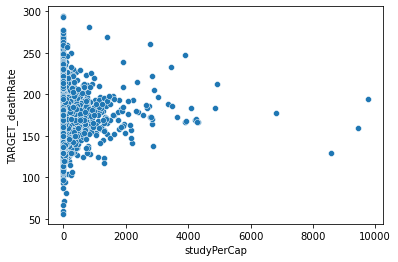

In [10]:
sns.scatterplot(data=df_cancer,x='studyPerCap',y='TARGET_deathRate')

In [11]:
#Retirando outlier
df_cancer_1 = df_cancer[~(df_cancer['studyPerCap']>6000)]

Text(0, 0.5, 'Média de casos reportados de cancer anualmente')

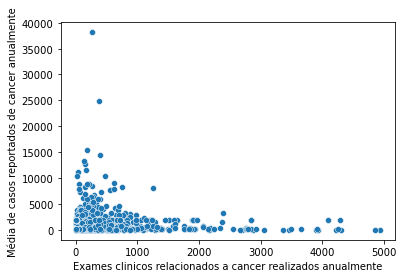

In [12]:
sns.scatterplot(data=df_cancer,x=df_cancer_1['studyPerCap'],y=df_cancer_1['avgAnnCount'])
plt.xlabel('Exames clinicos relacionados a cancer realizados anualmente')
plt.ylabel('Média de casos reportados de cancer anualmente')

Text(0, 0.5, 'Número médio de mortes por cancer anualmente')

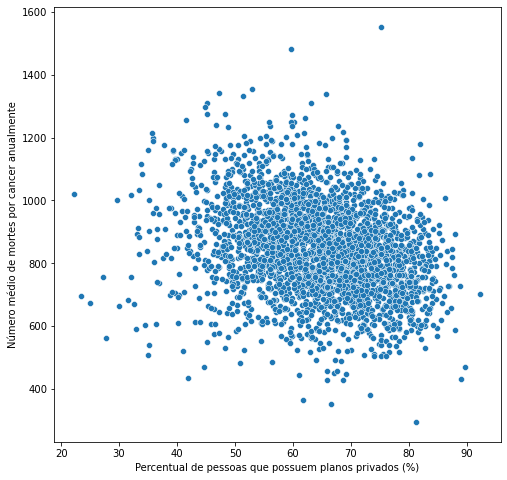

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_cancer,x='PctPrivateCoverage',y='avgDeathsPerYear')
plt.xlabel('Percentual de pessoas que possuem planos privados (%)')
plt.ylabel('Número médio de mortes por cancer anualmente')

Text(0, 0.5, 'Percentual de negros (%)')

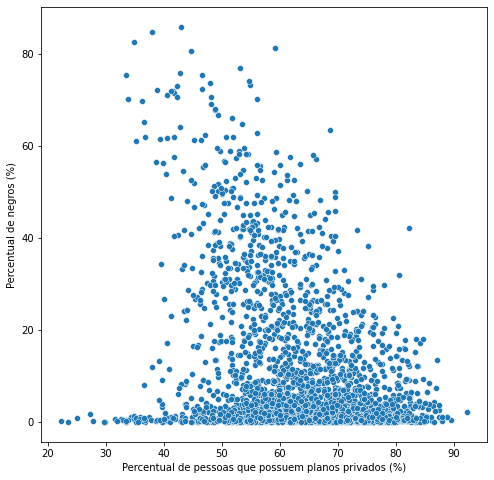

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_cancer,x='PctPrivateCoverage',y='PctBlack')
plt.xlabel('Percentual de pessoas que possuem planos privados (%)')
plt.ylabel('Percentual de negros (%)')

In [15]:
df_cancer = df_cancer.select_dtypes(include=[np.number])
df_cancer = df_cancer.dropna(axis='columns',how='any')

In [16]:
df_cancer.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [17]:
df_corr = df_cancer.corr(method='spearman')

<AxesSubplot:>

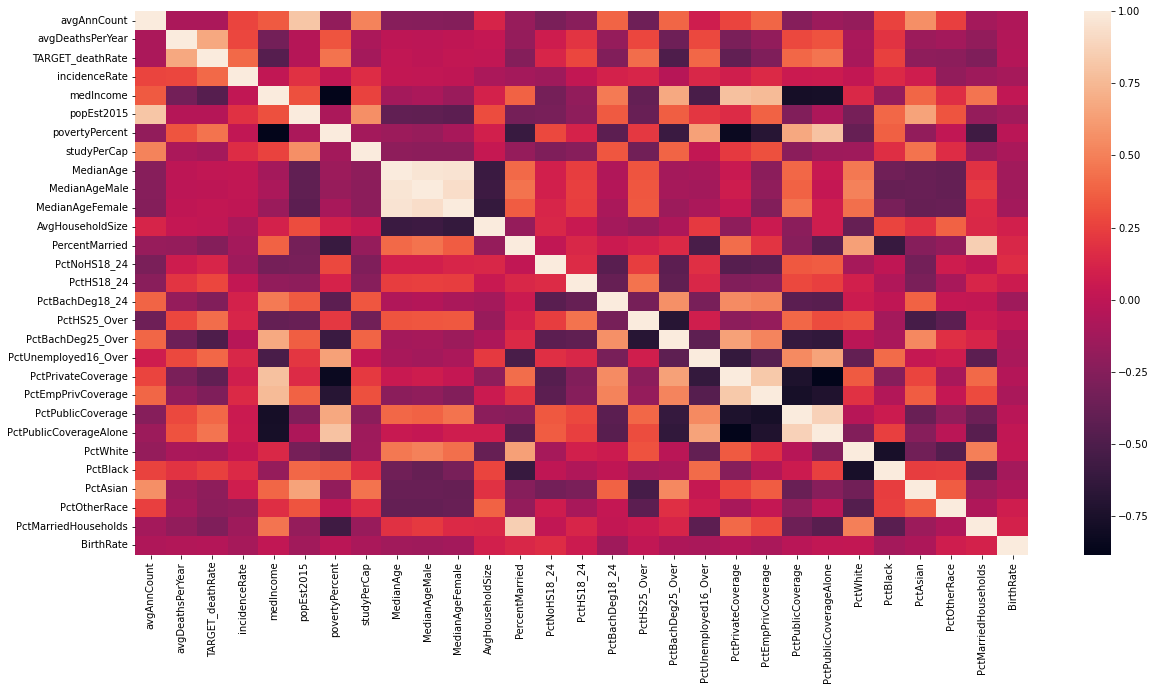

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr)

In [19]:
correlacao_abs = df_corr['TARGET_deathRate'].abs().sort_values(ascending=False)
correlacao_abs

TARGET_deathRate          1.000000
avgDeathsPerYear          0.672511
PctBachDeg25_Over         0.501730
medIncome                 0.463858
PctPublicCoverageAlone    0.453102
povertyPercent            0.442435
PctHS25_Over              0.420579
PctPrivateCoverage        0.411319
incidenceRate             0.407906
PctUnemployed16_Over      0.402940
PctPublicCoverage         0.402365
PctMarriedHouseholds      0.279620
PctEmpPrivCoverage        0.277938
PctHS18_24                0.275896
PctBachDeg18_24           0.270316
PercentMarried            0.257257
PctBlack                  0.251542
PctOtherRace              0.216924
PctAsian                  0.207830
PctNoHS18_24              0.124543
studyPerCap               0.112687
PctWhite                  0.101955
avgAnnCount               0.085583
BirthRate                 0.050487
popEst2015                0.044447
MedianAgeFemale           0.019903
AvgHouseholdSize          0.013300
MedianAge                 0.008589
MedianAgeMale       

In [20]:
correlacao_abs[correlacao_abs>0.5]

TARGET_deathRate     1.000000
avgDeathsPerYear     0.672511
PctBachDeg25_Over    0.501730
Name: TARGET_deathRate, dtype: float64

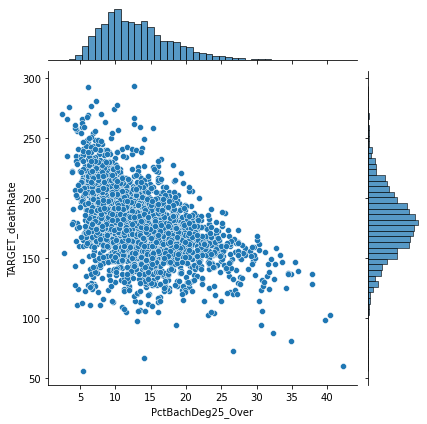

In [21]:
sns.jointplot(data=df_cancer, x='PctBachDeg25_Over',y='TARGET_deathRate')

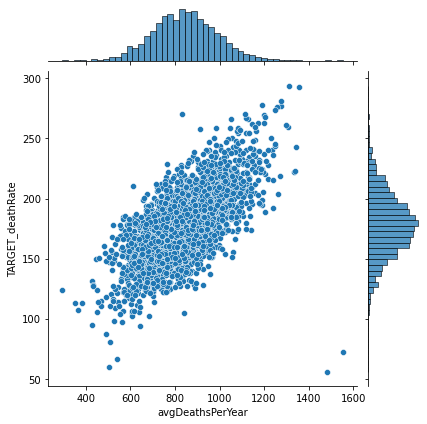

In [22]:
sns.jointplot(data=df_cancer, x='avgDeathsPerYear',y='TARGET_deathRate')

In [23]:
df_cancer[df_cancer['avgDeathsPerYear']>1400]['avgDeathsPerYear']

1220    1553.351487
1489    1483.055135
Name: avgDeathsPerYear, dtype: float64

In [24]:
df_cancer = df_cancer[~(df_cancer['avgDeathsPerYear']>1400)]
df_cancer

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000        890.770529             164.9     489.800000   
1      173.000000        669.088363             161.3     411.600000   
2      102.000000        744.083462             174.7     349.700000   
3      427.000000        953.773339             194.8     430.400000   
4       57.000000        646.194438             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684        762.753992             149.6     453.549422   
3043  1962.667684        838.694585             150.1     453.549422   
3044  1962.667684        829.638887             153.9     453.549422   
3045  1962.667684        943.206276             175.0     453.549422   
3046  1962.667684        808.811353             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0       61898.0    260131.0            11.2   499.748204       39.3   
1       48127.0     43269.0            18.6    23.111234       33.0   
2       49348.0     21026.0            14.6    47.560164       45.0   
3       44243.0     75882.0            17.1   342.637253       42.8   
4       49955.0     10321.0            12.5     0.000000       48.3   
...         ...         ...             ...          ...        ...   
3042    46961.0      6343.0            12.4     0.000000       44.2   
3043    48609.0     37118.0            18.8   377.175494       30.4   
3044    51144.0     34536.0            15.0  1968.959926       30.9   
3045    50745.0     25609.0            13.3     0.000000       39.0   
3046    41193.0     37030.0            13.9     0.000000       26.2   

      MedianAgeMale  ...  PctPrivateCoverage  PctEmpPrivCoverage  \
0              36.9  ...                75.1                41.6   
1              32.2  ...                70.2                43.6   
2              44.0  ...                63.7                34.9   
3              42.2  ...                58.4                35.0   
4              47.8  ...                61.6                35.1   
...             ...  ...                 ...                 ...   
3042           41.1  ...                78.3                44.6   
3043           29.3  ...                64.5                48.6   
3044           30.5  ...                62.0                47.8   
3045           36.9  ...                75.9                49.6   
3046           25.5  ...                76.1                22.9   

      PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
0                  32.9                    14.0  81.780529   2.594728   
1                  31.1                    15.3  89.228509   0.969102   
2                  42.1                    21.1  90.922190   0.739673   
3                  45.3                    25.0  91.744686   0.782626   
4                  44.0                    22.7  94.104024   0.270192   
...                 ...                     ...        ...        ...   
3042               31.7                    13.2  90.280811   3.837754   
3043               28.8                    17.7  75.706245   2.326771   
3044               26.6                    16.8  87.961629   2.313188   
3045               29.5                    14.0  92.905681   1.176562   
3046               25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
0     4.821857      1.843479             52.856076   6.118831  
1     2.246233      3.741352             45.372500   4.333096  
2     0.465898      2.747358             54.444868   3.729488  
3     1.161359      1.362643             51.021514   4.603841  
4     0.665830      0.492135             54.027460   6.796657  
...        ...           ...                   ...        ...  
3042  0.327613      1.700468             51.063830   7.773512  
3043  4.044920     14.130288             52.007937   8.186470  
3044  1.316472    

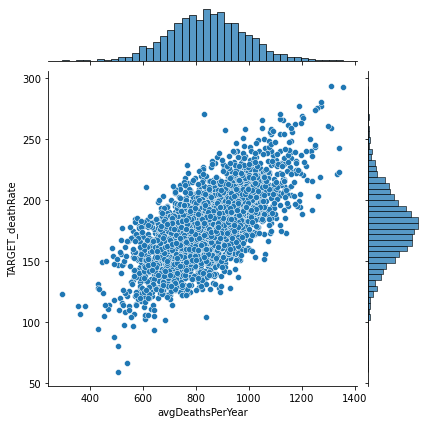

In [25]:
sns.jointplot(data=df_cancer, x='avgDeathsPerYear',y='TARGET_deathRate')

In [26]:
X = df_cancer['avgDeathsPerYear']
Y = df_cancer['TARGET_deathRate']

In [27]:
X.shape

(3045,)

In [28]:
Y.shape

(3045,)

### Regressão Linear Simples

O coeficiente linear é 62.71553899101859
O coeficiente angular é 0.13732128375775646
---------------------------------------------------------------------------------------------------------------------



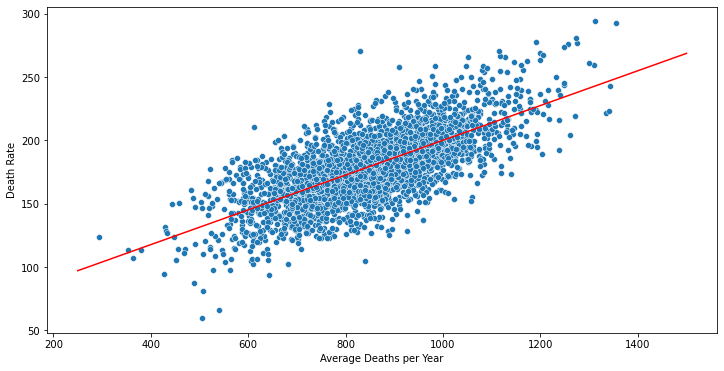

---------------------------------------------------------------------------------------------------------------------



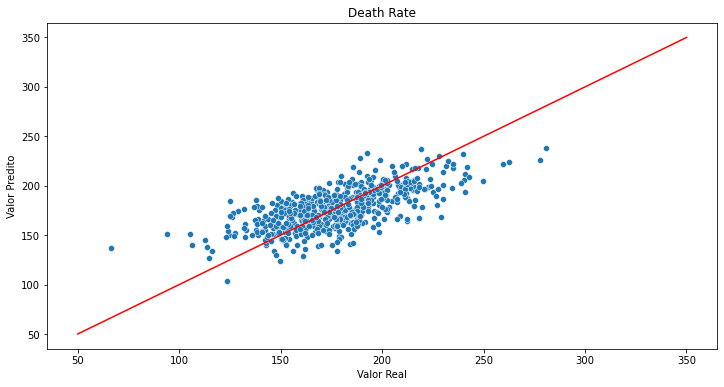

---------------------------------------------------------------------------------------------------------------------

Métricas de Teste

R^2: 0.46799819149288
MAE: 15.434911353896476
MSE: 381.0586034891743
RMSE: 19.520722412072107
---------------------------------------------------------------------------------------------------------------------

Métricas Treino
R^2: 0.495809618927315
MAE: 15.431671903226448
MSE: 385.42030036981447
RMSE: 19.63212419402991


In [29]:
#Importar
from sklearn.linear_model import LinearRegression
#Instanciar
reg_lin = LinearRegression()

#Treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.2, random_state=42)

#Treinar modelo 
reg_lin.fit(X_treino.values.reshape(-1,1),Y_treino)

#Printando coeficiente e intercepto
print(f'O coeficiente linear é {reg_lin.intercept_}')
print(f'O coeficiente angular é {reg_lin.coef_[0]}')

print('---------------------------------------------------------------------------------------------------------------------\n')
#Plot do modelo treinado
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cancer, x=df_cancer['avgDeathsPerYear'], y=df_cancer['TARGET_deathRate'])
x = np.linspace(250, 1500, 10000)
y = reg_lin.intercept_ + reg_lin.coef_*x
plt.plot(x, y, color="red")
plt.xlabel('Average Deaths per Year')
plt.ylabel('Death Rate')
plt.show()
# Previsão de Y com dados de teste
Y_pred = reg_lin.predict(X_teste.values.reshape(-1,1))
print('---------------------------------------------------------------------------------------------------------------------\n')
#Plot do Predito pelo real
plt.figure(figsize=(12, 6))
x = np.linspace(50, 350, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_teste, y=Y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
#Métricas
from sklearn import metrics
print('Métricas de Teste')
print('\nR^2:', metrics.r2_score(Y_teste,Y_pred))
print('MAE:', metrics.mean_absolute_error(Y_teste,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_teste,Y_pred))
print('RMSE:', metrics.mean_squared_error(Y_teste,Y_pred,squared=False))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Métricas Treino')
preditos_treino = reg_lin.predict(X_treino.values.reshape(-1,1))
print('R^2:', metrics.r2_score(Y_treino, preditos_treino))
print('MAE:', metrics.mean_absolute_error(Y_treino, preditos_treino))
print('MSE:', metrics.mean_squared_error(Y_treino, preditos_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treino, preditos_treino)))

### Avaliando os resíduos da Reg. Linear Simples

In [30]:
residuo = Y_teste - Y_pred

In [31]:
residuo.describe()

count    609.000000
mean       0.116635
std       19.536420
min      -70.539109
25%      -13.073168
50%       -0.583214
75%       13.081929
max       61.027283
Name: TARGET_deathRate, dtype: float64

In [32]:
df_cancer['TARGET_deathRate'].describe()

count    3045.000000
mean      178.566207
std        27.481759
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [33]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(residuo)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.8323138483830642

p-value: 0.6595767588132286

Falha em rejeitar H_0: amostra parece ser normal


<AxesSubplot:title={'center':'Distribuição dos resíduos'}, xlabel='TARGET_deathRate', ylabel='Count'>

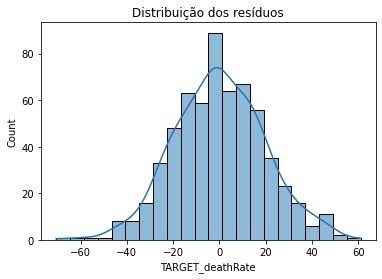

In [34]:
plt.title("Distribuição dos resíduos")
sns.histplot(Y_teste-Y_pred, kde=True)

### Regressão Linear Multipla

In [35]:
X = df_cancer.drop(columns=['TARGET_deathRate'])
Y = df_cancer['TARGET_deathRate']

O coeficiente linear é 78.67918579984615
Os coeficiente angulares são [-8.33234940e-04  8.92949693e-02  1.31111612e-01  1.23092538e-04
  2.23859004e-06  3.05404944e-01 -4.23993620e-04 -2.82786516e-03
 -5.19982795e-01  1.57491118e-01 -6.22216474e-01  5.93588793e-01
 -8.25160211e-02  1.52769143e-01 -9.33749122e-02  2.96724356e-01
 -7.99765058e-01  4.81179595e-01 -5.00599499e-01  2.51544487e-01
  9.58793976e-02 -1.19947456e-01 -4.22518139e-02 -5.60507803e-02
 -2.30410922e-02 -8.16463859e-01 -7.41209452e-01 -4.13002645e-01]




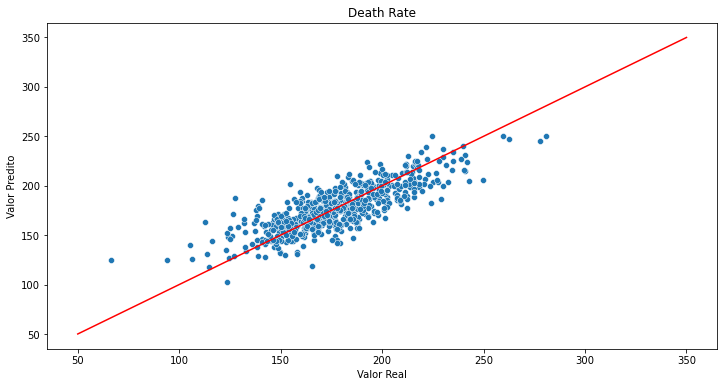

---------------------------------------------------------------------------------------------------------------------



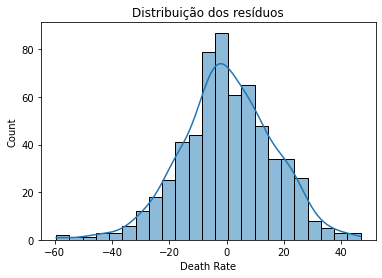

---------------------------------------------------------------------------------------------------------------------

Métricas Teste
R^2: 0.6400611996862176
MAE: 12.52749467665953
MSE: 257.8144931011133
RMSE: 16.05660278829595
---------------------------------------------------------------------------------------------------------------------

Métricas Treino
R^2: 0.6756785505802463
MAE: 12.064017359737184
MSE: 247.92236255240024
RMSE: 15.74555056364814


In [36]:
from sklearn.linear_model import LinearRegression
reg_mult = LinearRegression()

from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state = 42)
modelo = reg_mult.fit(X_treino,Y_treino)

print(f'O coeficiente linear é {modelo.intercept_}')
print(f'Os coeficiente angulares são {modelo.coef_}')
print('\n')

preditos = modelo.predict(X_teste)
plt.figure(figsize=(12, 6))
x = np.linspace(50, 350, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_teste, y=preditos)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
plt.title("Distribuição dos resíduos")
sns.histplot(Y_teste-preditos, kde=True)
plt.xlabel('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
from sklearn import metrics
print('Métricas Teste')
print('R^2:', metrics.r2_score(Y_teste, preditos))
print('MAE:', metrics.mean_absolute_error(Y_teste, preditos))
print('MSE:', metrics.mean_squared_error(Y_teste, preditos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_teste, preditos)))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Métricas Treino')
preditos_treino = modelo.predict(X_treino)
print('R^2:', metrics.r2_score(Y_treino, preditos_treino))
print('MAE:', metrics.mean_absolute_error(Y_treino, preditos_treino))
print('MSE:', metrics.mean_squared_error(Y_treino, preditos_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treino, preditos_treino)))

## Regressão Linear Múltipla com Min-Max Scale

O coeficiente linear é 121.39040548563041
Os coeficiente angulares são [-12.88514511  89.5266617  106.58062923  12.67791598  10.15693297
  13.37673653  -4.13915673  -1.68795271 -21.99527224   6.83511453
  -2.45644842  29.32328637  -5.28927695  11.01465518  -4.83682045
  14.03506204 -31.7506728   13.95420826 -34.4913055   14.18710904
   5.16789953  -5.27768807  -3.76004122  -4.75680684  -0.98199809
 -31.6328688  -35.88017791  -8.80776251]




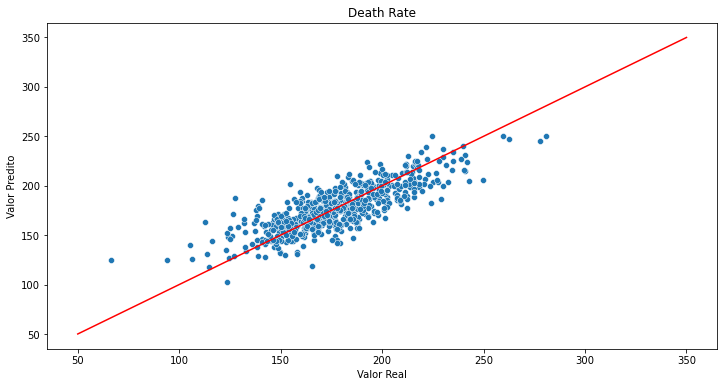

---------------------------------------------------------------------------------------------------------------------



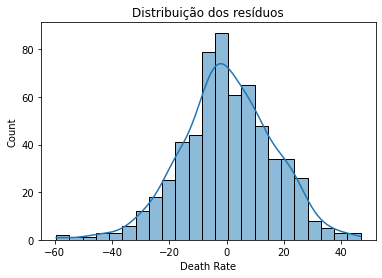

---------------------------------------------------------------------------------------------------------------------

Métricas Teste
R^2: 0.6400611996862176
MAE: 12.52749467665953
MSE: 257.8144931011133
RMSE: 16.05660278829595
---------------------------------------------------------------------------------------------------------------------

Métricas Treino
R^2: 0.6756785505802463
MAE: 12.064017359737045
MSE: 247.9223625524003
RMSE: 15.745550563648141


In [37]:
X = df_cancer.drop(columns=['TARGET_deathRate'])
Y = df_cancer['TARGET_deathRate']

from sklearn.linear_model import LinearRegression
reg_mult = LinearRegression()

from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state = 42)

#Aplicando mms
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_treino)

X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

X_treino = mms.fit_transform(X_treino)
# X_teste = mms.transform(X_teste)


modelo = reg_mult.fit(X_treino,Y_treino)

print(f'O coeficiente linear é {modelo.intercept_}')
print(f'Os coeficiente angulares são {modelo.coef_}')
print('\n')

preditos_mms = modelo.predict(X_teste)
plt.figure(figsize=(12, 6))
x = np.linspace(50, 350, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_teste, y=preditos)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
plt.title("Distribuição dos resíduos")
sns.histplot(Y_teste-preditos, kde=True)
plt.xlabel('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
from sklearn import metrics
print('Métricas Teste')
print('R^2:', metrics.r2_score(Y_teste, preditos))
print('MAE:', metrics.mean_absolute_error(Y_teste, preditos))
print('MSE:', metrics.mean_squared_error(Y_teste, preditos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_teste, preditos)))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Métricas Treino')
preditos_treino = modelo.predict(X_treino)
print('R^2:', metrics.r2_score(Y_treino, preditos_treino))
print('MAE:', metrics.mean_absolute_error(Y_treino, preditos_treino))
print('MSE:', metrics.mean_squared_error(Y_treino, preditos_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treino, preditos_treino)))

In [38]:
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Valores'])

coeff_df.abs().sort_values(by='Valores', ascending = False)


Valores
incidenceRate           106.580629
avgDeathsPerYear         89.526662
PctMarriedHouseholds     35.880178
PctPrivateCoverage       34.491305
PctBachDeg25_Over        31.750673
PctOtherRace             31.632869
PercentMarried           29.323286
MedianAgeMale            21.995272
PctEmpPrivCoverage       14.187109
PctHS25_Over             14.035062
PctUnemployed16_Over     13.954208
povertyPercent           13.376737
avgAnnCount              12.885145
medIncome                12.677916
PctHS18_24               11.014655
popEst2015               10.156933
BirthRate                 8.807763
MedianAgeFemale           6.835115
PctNoHS18_24              5.289277
PctPublicCoverageAlone    5.277688
PctPublicCoverage         5.167900
PctBachDeg18_24           4.836820
PctBlack                  4.756807
studyPerCap               4.139157
PctWhite                  3.760041
AvgHouseholdSize          2.456448
MedianAge                 1.687953
PctAsian                  0.981998

## Conclusões EDA

- Não existe relação bem definida entre o percentual de pobreza e a taxa de incidencia de cancer.
- Um maior número de realização de exames não implica em dizer que existe uma maior taxa de morte.
- Um maior número de exames não implica em dizer que existirá um maior número de casos reportados.
- Condados com maior percentual de plano privado não necessariamente possuem números médios de mortes por cancer menores.
- Nota-se que a maior parte dos condados com percentual pequeno de negros concentra a maior parte de pessoas que possuem planos privados.

## Observações sobre os três modelos

- Nota-se que o modelo de regressão linear simples obteve ajustes piores que os outros dois modelos.
- Os ajustes do modelo de regressão linear multipla e de regressão linear multipla que usou min-max scaler tiveram ajustes semelhantes sendo quase imperceptível sua diferença.
- Apesar da correlação demonstrar que o parametro "avgDeathsPerYear" é aquele que possui maior correlação, ao realizar o min-max scaler para a obtenção do modelo pode-se observar que parametro "incidenceRate" é que o mais importante do modelo. Entretanto, vale ressaltar que "avgDeathsPerYear" é o segundo mais importante.
- Ao analisar os resíduos na regressão linear simples e fazer o teste de hipotese nota-se que os mesmos não seguem uma distribuição normal o que nos leva a conclusão de que o modelo de regressão linear simples não é o mais adequado para os dados em questão.
- Os dados de treino levaram a melhores ajustes que os casos de teste.